In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dataframe_image as dfi
import matplotlib.image as mpimg
from PIL import Image

barplot = plt.bar
tableplot = plt.table

# Load Data Frames


10 Fold Results


In [2]:
path = "results"

In [3]:
folder = "10_fold"

absence_folds = pd.read_csv(f"{path}/{folder}/absence_results.csv")
tonicclonic_folds = pd.read_csv(f"{path}/{folder}/tonic-clonic_results.csv")
general_folds = pd.read_csv(f"{path}/{folder}/general_results.csv")

PyTorch Results


In [4]:
folder = "pytorch_inference"

absence_pytorch = pd.read_csv(
    f"{path}/{folder}/default/absence/absence_pytorch_results.csv"
)
tonicclonic_pytorch = pd.read_csv(
    f"{path}/{folder}/default/tonic-clonic/tonic-clonic_pytorch_results.csv"
)
general_pytorch = pd.read_csv(
    f"{path}/{folder}/default/general/general_pytorch_results.csv"
)

Tflite Inference Results


In [5]:
folder = "tflite_inference"

absence_tflite = pd.read_csv(f"{path}/{folder}/absence/absence_tflite_results.csv")
tonicclonic_tflite = pd.read_csv(
    f"{path}/{folder}/tonic-clonic/tonic-clonic_tflite_results.csv"
)
general_tflite = pd.read_csv(f"{path}/{folder}/general/general_tflite_results.csv")

# Load Datasets


In [6]:
absence_train_x = np.load(f"melspectrograms/absence/imb_absence_x.npy")
absence_train_y = np.load(f"melspectrograms/absence/imb_absence_y.npy")

absence_smote_train_x = np.load(f"melspectrograms/absence/train_absence_x.npy")
absence_smote_train_y = np.load(f"melspectrograms/absence/train_absence_y.npy")

absence_validation_x = np.load(f"melspectrograms/absence/validation_absence_x.npy")
absence_validation_y = np.load(f"melspectrograms/absence/validation_absence_y.npy")

absence_test_x = np.load(f"melspectrograms/absence/test_absence_x.npy")
absence_test_y = np.load(f"melspectrograms/absence/test_absence_y.npy")

In [7]:
tonicclonic_train_x = np.load(f"melspectrograms/tonic-clonic/imb_tonic-clonic_x.npy")
tonicclonic_train_y = np.load(f"melspectrograms/tonic-clonic/imb_tonic-clonic_y.npy")

tonicclonic_smote_train_x = np.load(
    f"melspectrograms/tonic-clonic/train_tonic-clonic_x.npy"
)
tonicclonic_smote_train_y = np.load(
    f"melspectrograms/tonic-clonic/train_tonic-clonic_y.npy"
)

tonicclonic_validation_x = np.load(
    f"melspectrograms/tonic-clonic/validation_tonic-clonic_x.npy"
)
tonicclonic_validation_y = np.load(
    f"melspectrograms/tonic-clonic/validation_tonic-clonic_y.npy"
)

tonicclonic_test_x = np.load(f"melspectrograms/tonic-clonic/test_tonic-clonic_x.npy")
tonicclonic_test_y = np.load(f"melspectrograms/tonic-clonic/test_tonic-clonic_y.npy")

In [8]:
general_train_x = np.load(f"melspectrograms/general/imb_general_x.npy")
general_train_y = np.load(f"melspectrograms/general/imb_general_y.npy")

general_smote_train_x = np.load(f"melspectrograms/general/train_general_x.npy")
general_smote_train_y = np.load(f"melspectrograms/general/train_general_y.npy")

general_validation_x = np.load(f"melspectrograms/general/validation_general_x.npy")
general_validation_y = np.load(f"melspectrograms/general/validation_general_y.npy")

general_test_x = np.load(f"melspectrograms/general/test_general_x.npy")
general_test_y = np.load(f"melspectrograms/general/test_general_y.npy")

# Dataset Displaying


In [9]:
total_absence = len(absence_train_y) + len(absence_validation_y) + len(absence_test_y)
total_general = len(general_train_y) + len(general_validation_y) + len(general_test_y)
total_tonicclonic = (
    len(tonicclonic_train_y) + len(tonicclonic_validation_y) + len(tonicclonic_test_y)
)
total = total_absence + total_general + total_tonicclonic
print(f"total absence: {total_absence}")
print(f"total general: {total_general}")
print(f"total tonic-clonic: {total_tonicclonic}")

total_background = 0
absence = 0
for i, v in enumerate(absence_train_y):
    if absence_train_y[i] == 0:
        total_background += 1
    else:
        absence += 1
for i, v in enumerate(absence_validation_y):
    if absence_validation_y[i] == 0:
        total_background += 1
    else:
        absence += 1
for i, v in enumerate(absence_test_y):
    if absence_test_y[i] == 0:
        total_background += 1
    else:
        absence += 1

general = 0
for i, v in enumerate(general_train_y):
    if general_train_y[i] == 0:
        total_background += 1
    else:
        general += 1
for i, v in enumerate(general_validation_y):
    if general_validation_y[i] == 0:
        total_background += 1
    else:
        general += 1
for i, v in enumerate(general_test_y):
    if general_test_y[i] == 0:
        total_background += 1
    else:
        general += 1

tonicclonic = 0
for i, v in enumerate(tonicclonic_train_y):
    if tonicclonic_train_y[i] == 0:
        total_background += 1
    else:
        tonicclonic += 1
for i, v in enumerate(tonicclonic_validation_y):
    if tonicclonic_validation_y[i] == 0:
        total_background += 1
    else:
        tonicclonic += 1
for i, v in enumerate(tonicclonic_test_y):
    if tonicclonic_test_y[i] == 0:
        total_background += 1
    else:
        tonicclonic += 1

print(general + tonicclonic + absence)

concact_absence = np.concatenate(
    [absence_train_y, absence_validation_y, absence_test_y]
)
concact_general = np.concatenate(
    [general_train_y, general_validation_y, general_test_y]
)
concact_tonicclonic = np.concatenate(
    [tonicclonic_train_y, tonicclonic_validation_y, tonicclonic_test_y]
)

size_each = []
for i in range(3):
    if i == 0:
        size_each.append(len(concact_absence))
    elif i == 1:
        size_each.append(len(concact_tonicclonic))
    else:
        size_each.append(len(concact_general))

a = []
c = 0
for i in size_each:
    for j in range(i):
        if c == 0:
            a.append(0)
        if c == 1:
            a.append(1)
        if c == 2:
            a.append(2)
    c += 1

total absence: 5590
total general: 5349
total tonic-clonic: 5223
3053


Rectangle(xy=(0, 0), width=0.5, height=4100, angle=0)
Rectangle(xy=(0.5, 0), width=0.5, height=1249, angle=0)


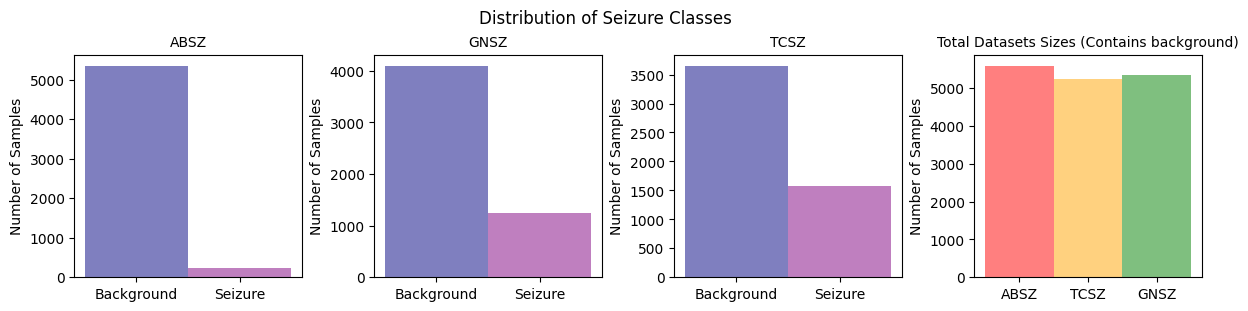

In [10]:
fig, ((ax0, ax1, ax2, ax3)) = plt.subplots(
    nrows=1, ncols=4, figsize=(12, 3), constrained_layout=True
)

fig.suptitle("Distribution of Seizure Classes", fontsize=12)

n, bins, p = ax0.hist(
    concact_absence,
    bins=2,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 1),
)
ax0.set_title("ABSZ", fontsize=10)
ax0.set_xticks([0.25, 0.75], ["Background", "Seizure"])
ax0.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")

n, bins, p = ax1.hist(
    concact_general,
    bins=2,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 1),
)
ax1.set_title("GNSZ", fontsize=10)
ax1.set_xticks([0.25, 0.75], ["Background", "Seizure"])
ax1.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")

print(p[0])
print(p[1])

n, bins, p = ax2.hist(
    concact_tonicclonic,
    bins=2,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 1),
)
ax2.set_title("TCSZ", fontsize=10)
ax2.set_xticks([0.25, 0.75], ["Background", "Seizure"])
ax2.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")

# histogram showing 3 bars for each class
n, bins, p = ax3.hist(
    a,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax3.set_title("Total Datasets Sizes (Contains background)", fontsize=10)
ax3.set_xticks([0.5, 1.5, 2.5], ["ABSZ", "TCSZ", "GNSZ"])
ax3.set_ylabel("Number of Samples")
p[0].set_facecolor("red")
p[1].set_facecolor("orange")
p[2].set_facecolor("green")

In [11]:
absence_split = []
for i, v in enumerate(absence_train_y):
    absence_split.append(0)
for i, v in enumerate(absence_validation_y):
    absence_split.append(1)
for i, v in enumerate(absence_test_y):
    absence_split.append(2)

tonicclonic_split = []
for i, v in enumerate(tonicclonic_train_y):
    tonicclonic_split.append(0)
for i, v in enumerate(tonicclonic_validation_y):
    tonicclonic_split.append(1)
for i, v in enumerate(tonicclonic_test_y):
    tonicclonic_split.append(2)

general_split = []
for i, v in enumerate(general_train_y):
    general_split.append(0)
for i, v in enumerate(general_validation_y):
    general_split.append(1)
for i, v in enumerate(general_test_y):
    general_split.append(2)

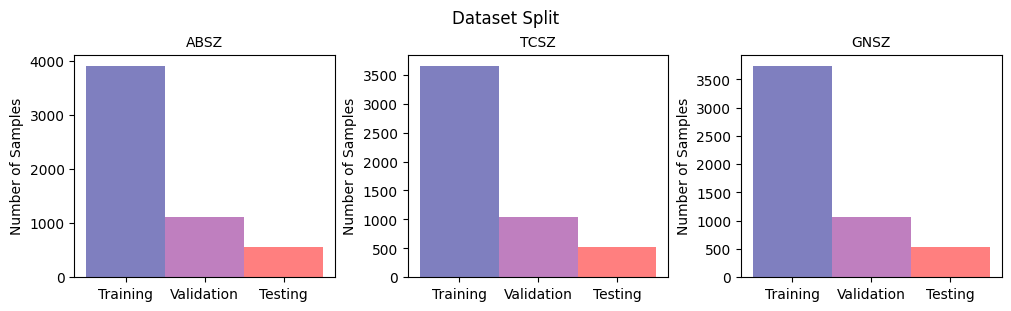

In [12]:
fig, ((ax0, ax1, ax2)) = plt.subplots(
    nrows=1, ncols=3, figsize=(10, 3), constrained_layout=True
)

fig.suptitle("Dataset Split", fontsize=12)

n, bins, p = ax0.hist(
    absence_split,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax0.set_title("ABSZ", fontsize=10)
ax0.set_xticks([0.5, 1.5, 2.5], ["Training", "Validation", "Testing"])
ax0.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")

n, bins, p = ax1.hist(
    tonicclonic_split,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax1.set_title("TCSZ", fontsize=10)
ax1.set_xticks([0.5, 1.5, 2.5], ["Training", "Validation", "Testing"])
ax1.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")


n, bins, p = ax2.hist(
    general_split,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax2.set_title("GNSZ", fontsize=10)
ax2.set_xticks([0.5, 1.5, 2.5], ["Training", "Validation", "Testing"])
ax2.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")

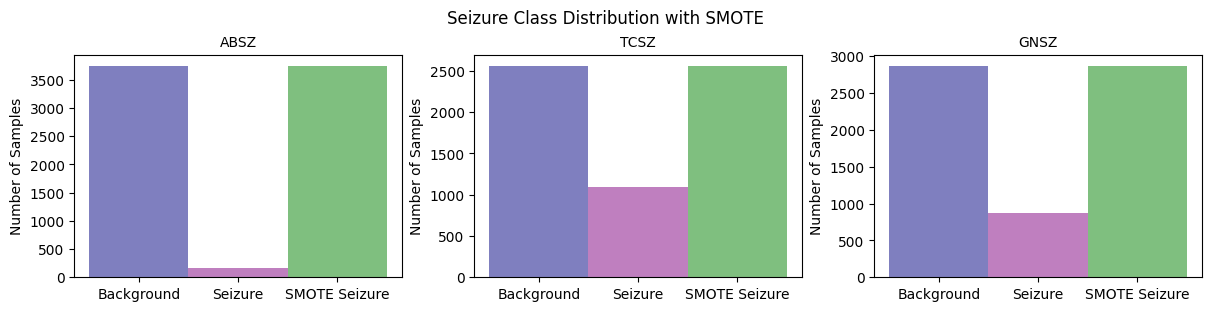

In [13]:
fig, ((ax0, ax1, ax2)) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3), constrained_layout=True
)

fig.suptitle("Seizure Class Distribution with SMOTE", fontsize=12)

absence_difference = []
for i in absence_train_y:
    if i == 0:
        absence_difference.append(0)
    else:
        absence_difference.append(1)
for i in absence_smote_train_y:
    if i == 1:
        absence_difference.append(2)

n, bins, p = ax0.hist(
    absence_difference,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax0.set_title("ABSZ", fontsize=10)
ax0.set_xticks([0.5, 1.5, 2.5], ["Background", "Seizure", "SMOTE Seizure"])
ax0.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")
p[2].set_facecolor("green")

tonicclonic_difference = []
for i in tonicclonic_train_y:
    if i == 0:
        tonicclonic_difference.append(0)
    else:
        tonicclonic_difference.append(1)
for i in tonicclonic_smote_train_y:
    if i == 1:
        tonicclonic_difference.append(2)

n, bins, p = ax1.hist(
    tonicclonic_difference,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax1.set_title("TCSZ", fontsize=10)
ax1.set_xticks([0.5, 1.5, 2.5], ["Background", "Seizure", "SMOTE Seizure"])
ax1.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")
p[2].set_facecolor("green")

general_difference = []
for i in general_train_y:
    if i == 0:
        general_difference.append(0)
    else:
        general_difference.append(1)
for i in general_smote_train_y:
    if i == 1:
        general_difference.append(2)

n, bins, p = ax2.hist(
    general_difference,
    bins=3,
    alpha=0.5,
    label="train",
    color="r",
    linewidth=10,
    range=(0, 3),
)
ax2.set_title("GNSZ", fontsize=10)
ax2.set_xticks([0.5, 1.5, 2.5], ["Background", "Seizure", "SMOTE Seizure"])
ax2.set_ylabel("Number of Samples")
p[0].set_facecolor("navy")
p[1].set_facecolor("purple")
p[2].set_facecolor("green")

# 10 Fold Displaying


In [14]:
dfi.export(
    absence_folds, "results/10_fold/absence_table.png", table_conversion="matplotlib"
)
dfi.export(
    tonicclonic_folds,
    "results/10_fold/tonicclonic_table.png",
    table_conversion="matplotlib",
)
dfi.export(
    general_folds, "results/10_fold/general_table.png", table_conversion="matplotlib"
)

['accuracy' 'sensitivity' 'specificity' 'roc_auc' 'gmean']


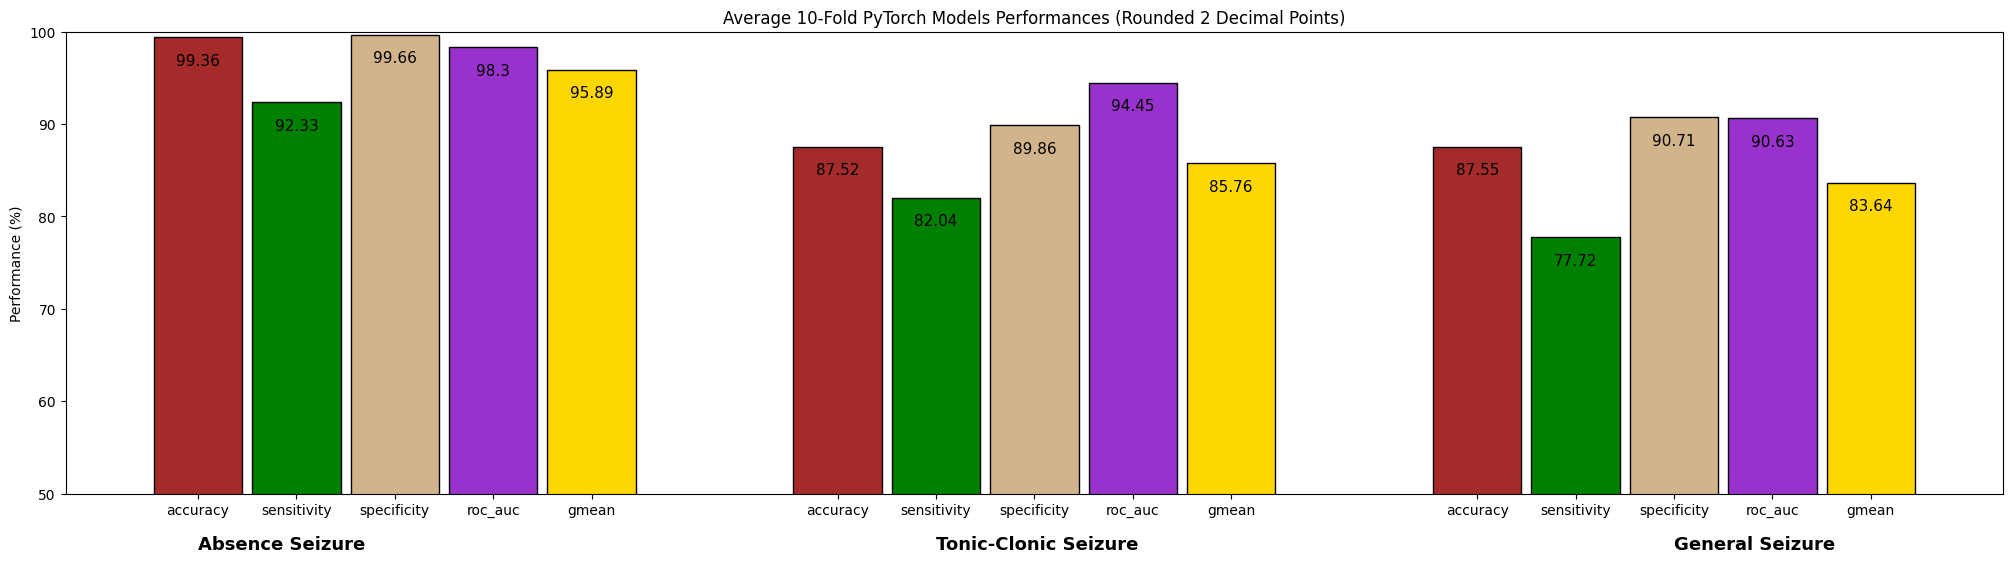

In [26]:
absence_average = absence_folds.loc[len(absence_folds) - 1]
tonicclonic_average = tonicclonic_folds.loc[len(tonicclonic_folds) - 1]
general_average = general_folds.loc[len(general_folds) - 1]
df_columns = absence_folds.columns.values[1:-1]

df_columns = np.delete(df_columns, 3)

c = 0
bar_x = []
for i in range(len(df_columns) * 3):
    if c == 5 or c == 11.5:
        c += 1.5
    bar_x.append(c)
    c += 1

tick_label = []
for i in range(3):
    for j in range(len(df_columns)):
        tick_label.append(df_columns[j])

print(df_columns)

height = [
    absence_average[df_columns[0]],
    absence_average[df_columns[1]],
    absence_average[df_columns[2]],
    absence_average[df_columns[3]],
    absence_average[df_columns[4]],
    tonicclonic_average[df_columns[0]],
    tonicclonic_average[df_columns[1]],
    tonicclonic_average[df_columns[2]],
    tonicclonic_average[df_columns[3]],
    tonicclonic_average[df_columns[4]],
    general_average[df_columns[0]],
    general_average[df_columns[1]],
    general_average[df_columns[2]],
    general_average[df_columns[3]],
    general_average[df_columns[4]],
]

plt.figure(figsize=(25, 6))
bar = barplot(bar_x, height, width=0.9, tick_label=tick_label, edgecolor="black")

for i in range(len(bar)):
    if i == 0 or i == 5 or i == 10:
        bar[i].set_color("brown")
        bar[i].set_edgecolor("black")

        bar[i + 1].set_color("green")
        bar[i + 1].set_edgecolor("black")

        bar[i + 2].set_color("tan")
        bar[i + 2].set_edgecolor("black")

        bar[i + 3].set_color("darkorchid")
        bar[i + 3].set_edgecolor("black")

        bar[i + 4].set_color("gold")
        bar[i + 4].set_edgecolor("black")

for i, v in enumerate(height):
    plt.text(
        bar_x[i],
        v - 3,
        str(round(v, 2)),
        ha="center",
        fontsize=11,
        color="black",
        fontweight="roman",
    )
# https://stackoverflow.com/questions/53066633/how-to-show-values-on-top-of-bar-plot

plt.ylabel("Performance (%)")
plt.ylim(50, 100)
plt.title("Average 10-Fold PyTorch Models Performances (Rounded 2 Decimal Points)")

plt.text(0, 44, "Absence Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(7.5, 44, "Tonic-Clonic Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(15, 44, "General Seizure", fontsize=13, color="black", fontweight="bold")

pass

['accuracy' 'sensitivity' 'specificity' 'roc_auc' 'gmean']


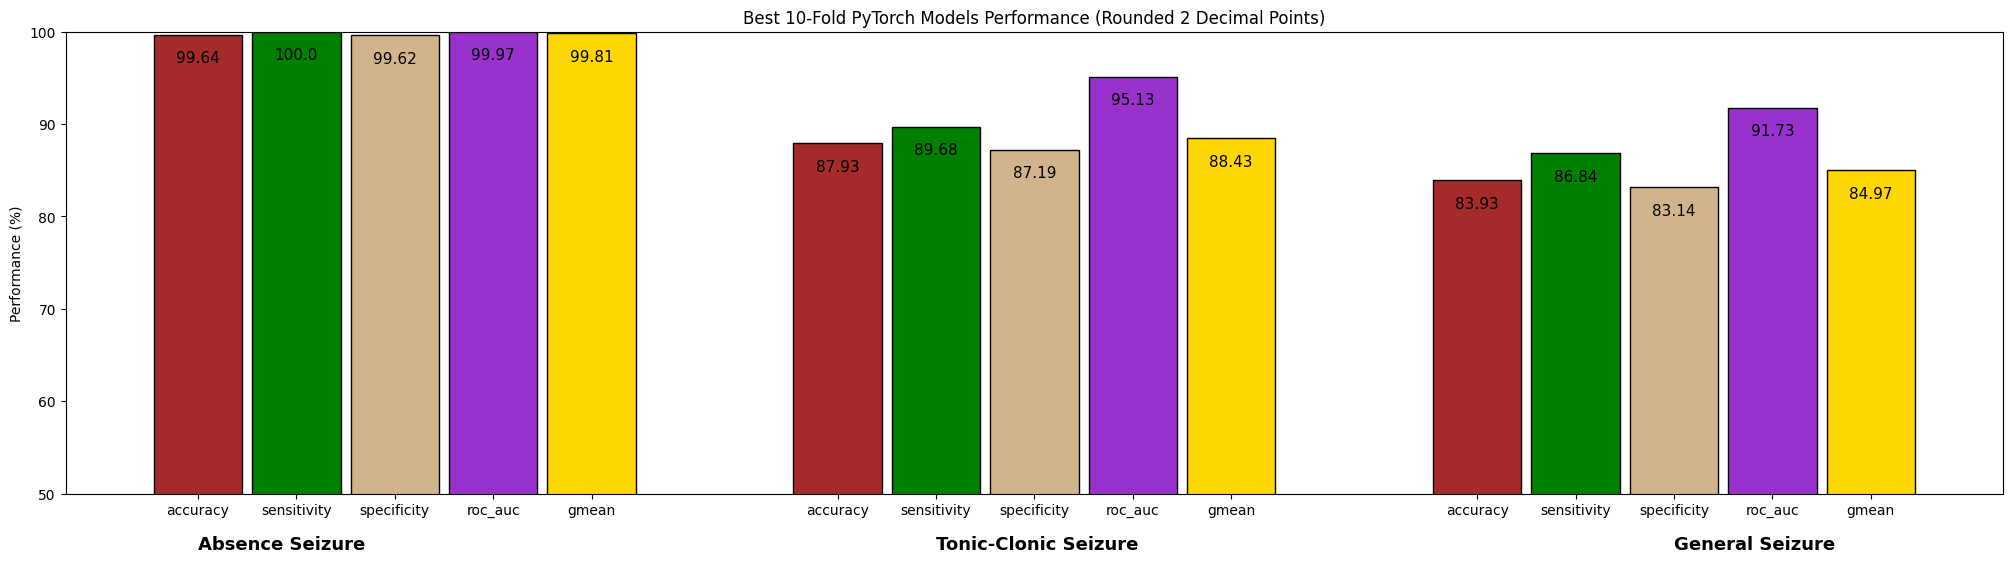

In [25]:
absence_best = absence_folds.loc[9]
tonicclonic_best = tonicclonic_folds.loc[3]
general_best = general_folds.loc[7]
df_columns = absence_folds.columns.values[1:-1]

df_columns = np.delete(df_columns, 3)

c = 0
bar_x = []
for i in range(len(df_columns) * 3):
    if c == 5 or c == 11.5:
        c += 1.5
    bar_x.append(c)
    c += 1

tick_label = []
for i in range(3):
    for j in range(len(df_columns)):
        tick_label.append(df_columns[j])

print(df_columns)

height = [
    absence_best[df_columns[0]],
    absence_best[df_columns[1]],
    absence_best[df_columns[2]],
    absence_best[df_columns[3]],
    absence_best[df_columns[4]],
    tonicclonic_best[df_columns[0]],
    tonicclonic_best[df_columns[1]],
    tonicclonic_best[df_columns[2]],
    tonicclonic_best[df_columns[3]],
    tonicclonic_best[df_columns[4]],
    general_best[df_columns[0]],
    general_best[df_columns[1]],
    general_best[df_columns[2]],
    general_best[df_columns[3]],
    general_best[df_columns[4]],
]

plt.figure(figsize=(25, 6))
bar = barplot(bar_x, height, width=0.9, tick_label=tick_label, edgecolor="black")

for i in range(len(bar)):
    if i == 0 or i == 5 or i == 10:
        bar[i].set_color("brown")
        bar[i].set_edgecolor("black")

        bar[i + 1].set_color("green")
        bar[i + 1].set_edgecolor("black")

        bar[i + 2].set_color("tan")
        bar[i + 2].set_edgecolor("black")

        bar[i + 3].set_color("darkorchid")
        bar[i + 3].set_edgecolor("black")

        bar[i + 4].set_color("gold")
        bar[i + 4].set_edgecolor("black")

for i, v in enumerate(height):
    plt.text(
        bar_x[i],
        v - 3,
        str(round(v, 2)),
        ha="center",
        fontsize=11,
        color="black",
        fontweight="roman",
    )
# https://stackoverflow.com/questions/53066633/how-to-show-values-on-top-of-bar-plot

plt.ylabel("Performance (%)")
plt.ylim(50, 100)
plt.title("Best 10-Fold PyTorch Models Performance (Rounded 2 Decimal Points)")

plt.text(0, 44, "Absence Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(7.5, 44, "Tonic-Clonic Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(15, 44, "General Seizure", fontsize=13, color="black", fontweight="bold")

pass

# PyTorch Displaying


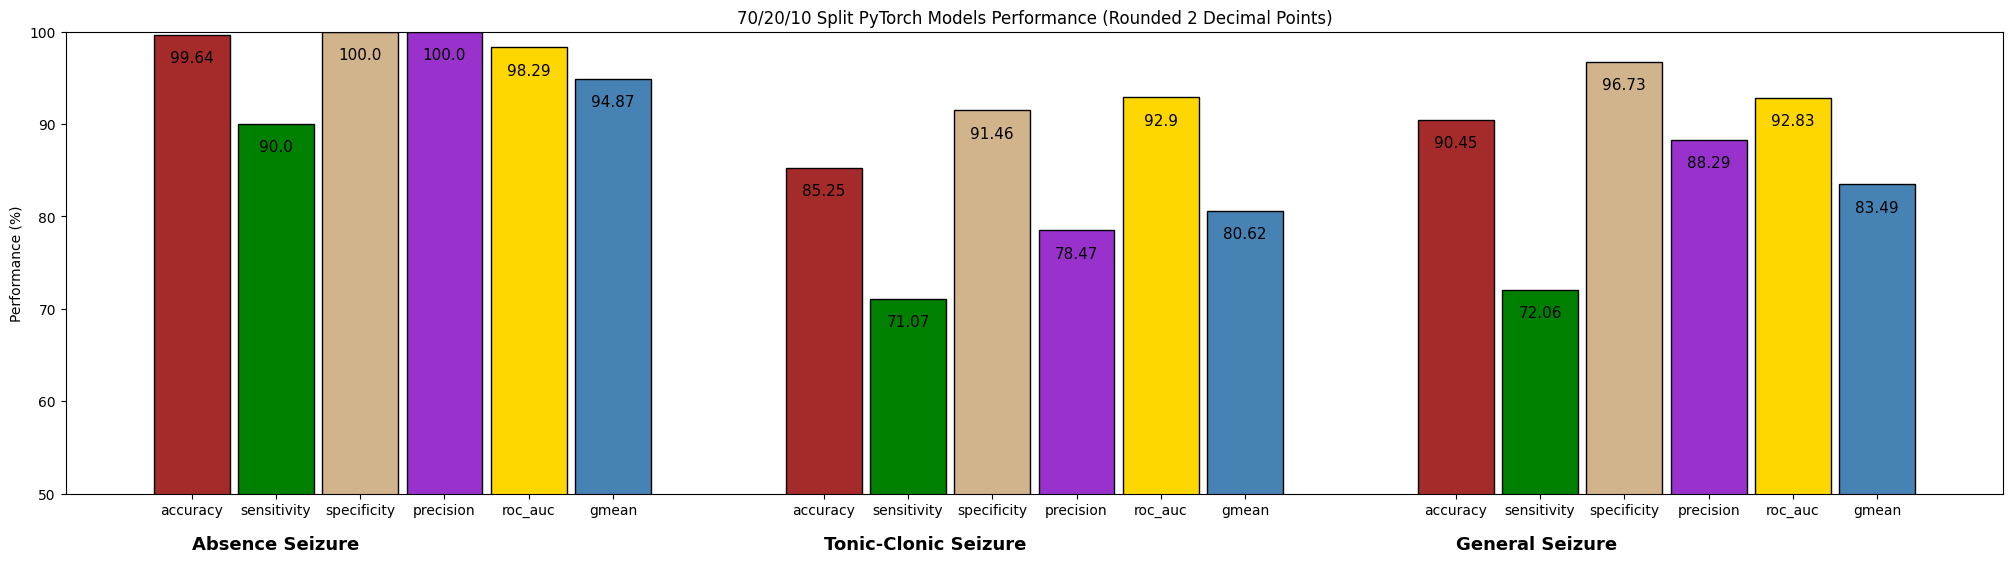

In [45]:
absence_pytorch_selection = absence_pytorch.loc[0]
tonicclonic_pytorch_selection = tonicclonic_pytorch.loc[0]
general_pytorch_selection = general_pytorch.loc[0]
df_columns = absence_folds.columns.values[1:-1]

c = 0
bar_x = []
for i in range(len(df_columns) * 3):
    if c == 6 or c == 13.5:
        c += 1.5
    bar_x.append(c)
    c += 1

tick_label = []
for i in range(3):
    for j in range(len(df_columns)):
        tick_label.append(df_columns[j])

height = [
    absence_pytorch_selection[df_columns[0]],
    absence_pytorch_selection[df_columns[1]],
    absence_pytorch_selection[df_columns[2]],
    absence_pytorch_selection[df_columns[3]],
    absence_pytorch_selection[df_columns[4]],
    absence_pytorch_selection[df_columns[5]],
    tonicclonic_pytorch_selection[df_columns[0]],
    tonicclonic_pytorch_selection[df_columns[1]],
    tonicclonic_pytorch_selection[df_columns[2]],
    tonicclonic_pytorch_selection[df_columns[3]],
    tonicclonic_pytorch_selection[df_columns[4]],
    tonicclonic_pytorch_selection[df_columns[5]],
    general_pytorch_selection[df_columns[0]],
    general_pytorch_selection[df_columns[1]],
    general_pytorch_selection[df_columns[2]],
    general_pytorch_selection[df_columns[3]],
    general_pytorch_selection[df_columns[4]],
    general_pytorch_selection[df_columns[5]],
]

plt.figure(figsize=(25, 6))
bar = barplot(bar_x, height, width=0.9, tick_label=tick_label, edgecolor="black")

for i in range(len(bar)):
    if i == 0 or i == 6 or i == 12:
        bar[i].set_color("brown")
        bar[i].set_edgecolor("black")

        bar[i + 1].set_color("green")
        bar[i + 1].set_edgecolor("black")

        bar[i + 2].set_color("tan")
        bar[i + 2].set_edgecolor("black")

        bar[i + 3].set_color("darkorchid")
        bar[i + 3].set_edgecolor("black")

        bar[i + 4].set_color("gold")
        bar[i + 4].set_edgecolor("black")

        bar[i + 5].set_color("steelblue")
        bar[i + 5].set_edgecolor("black")

for i, v in enumerate(height):
    plt.text(
        bar_x[i],
        v - 3,
        str(round(v, 2)),
        ha="center",
        fontsize=11,
        color="black",
        fontweight="roman",
    )
# https://stackoverflow.com/questions/53066633/how-to-show-values-on-top-of-bar-plot

plt.ylabel("Performance (%)")
plt.ylim(50, 100)
plt.title("70/20/10 Split PyTorch Models Performance (Rounded 2 Decimal Points)")

plt.text(0, 44, "Absence Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(7.5, 44, "Tonic-Clonic Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(15, 44, "General Seizure", fontsize=13, color="black", fontweight="bold")

pass

# TFLite Displaying


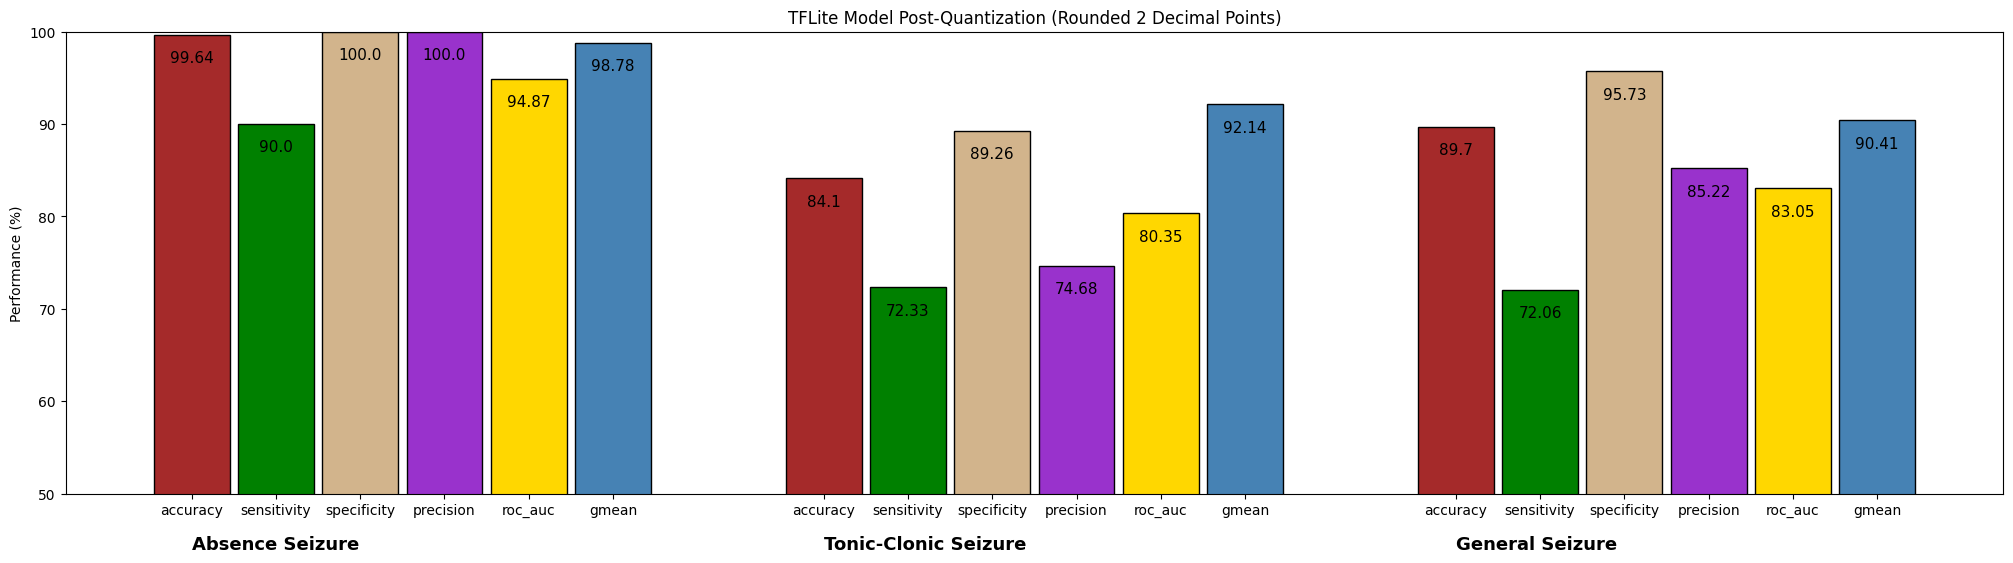

In [46]:
absence_tflite_selection = absence_tflite.loc[0]
tonicclonic_tflite_selection = tonicclonic_tflite.loc[0]
general_tflite_selection = general_tflite.loc[0]
df_columns = absence_folds.columns.values[1:-1]

c = 0
bar_x = []
for i in range(len(df_columns) * 3):
    if c == 6 or c == 13.5:
        c += 1.5
    bar_x.append(c)
    c += 1

tick_label = []
for i in range(3):
    for j in range(len(df_columns)):
        tick_label.append(df_columns[j])

height = [
    absence_tflite_selection[df_columns[0]],
    absence_tflite_selection[df_columns[1]],
    absence_tflite_selection[df_columns[2]],
    absence_tflite_selection[df_columns[3]],
    absence_tflite_selection[df_columns[4]],
    absence_tflite_selection[df_columns[5]],
    tonicclonic_tflite_selection[df_columns[0]],
    tonicclonic_tflite_selection[df_columns[1]],
    tonicclonic_tflite_selection[df_columns[2]],
    tonicclonic_tflite_selection[df_columns[3]],
    tonicclonic_tflite_selection[df_columns[4]],
    tonicclonic_tflite_selection[df_columns[5]],
    general_tflite_selection[df_columns[0]],
    general_tflite_selection[df_columns[1]],
    general_tflite_selection[df_columns[2]],
    general_tflite_selection[df_columns[3]],
    general_tflite_selection[df_columns[4]],
    general_tflite_selection[df_columns[5]],
]

plt.figure(figsize=(25, 6))
bar = barplot(bar_x, height, width=0.9, tick_label=tick_label, edgecolor="black")

for i in range(len(bar)):
    if i == 0 or i == 6 or i == 12:
        bar[i].set_color("brown")
        bar[i].set_edgecolor("black")

        bar[i + 1].set_color("green")
        bar[i + 1].set_edgecolor("black")

        bar[i + 2].set_color("tan")
        bar[i + 2].set_edgecolor("black")

        bar[i + 3].set_color("darkorchid")
        bar[i + 3].set_edgecolor("black")

        bar[i + 4].set_color("gold")
        bar[i + 4].set_edgecolor("black")

        bar[i + 5].set_color("steelblue")
        bar[i + 5].set_edgecolor("black")

for i, v in enumerate(height):
    plt.text(
        bar_x[i],
        v - 3,
        str(round(v, 2)),
        ha="center",
        fontsize=11,
        color="black",
        fontweight="roman",
    )
# https://stackoverflow.com/questions/53066633/how-to-show-values-on-top-of-bar-plot

plt.ylabel("Performance (%)")
plt.ylim(50, 100)
plt.title("TFLite Model Post-Quantization (Rounded 2 Decimal Points)")

plt.text(0, 44, "Absence Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(7.5, 44, "Tonic-Clonic Seizure", fontsize=13, color="black", fontweight="bold")
plt.text(15, 44, "General Seizure", fontsize=13, color="black", fontweight="bold")

pass

(-0.5, 1022.5, 465.5, -0.5)

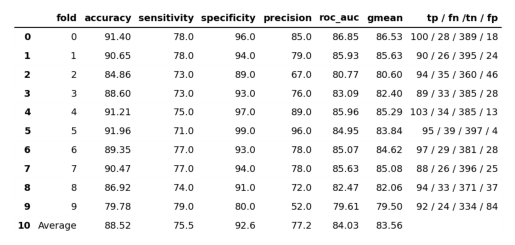

In [47]:
img = mpimg.imread("results/10_fold/general_table.png")
plt.imshow(img)
plt.axis("off")

# Other


In [48]:
text = """
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8"""

(0.0, 1.0, 0.0, 1.0)

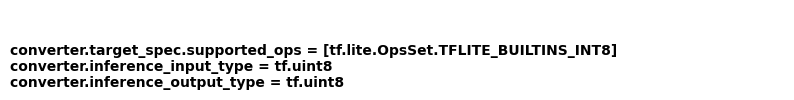

In [49]:
a = plt.figure(figsize=(10, 1))
plt.text(0, 0, text, fontsize=10, fontweight="bold")
plt.grid(True)
plt.axis("off")

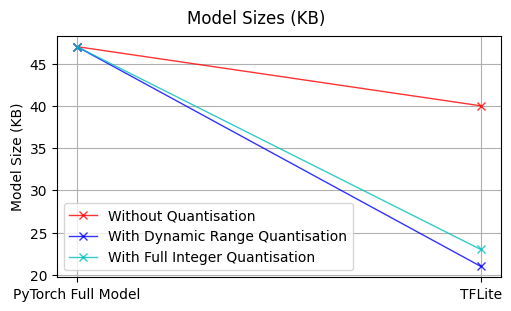

In [50]:
size = [47, 47, 47]
tflite_size = [21, 21, 21]

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1, figsize=(5, 3), constrained_layout=True)

fig.suptitle("Model Sizes (KB)", fontsize=12)

ax0.plot(
    ["PyTorch Full Model", "TFLite"],
    [size[0], 40],
    marker="x",
    color="r",
    alpha=0.8,
    label="Without Quantisation",
    linewidth=1,
)

ax0.plot(
    ["PyTorch Full Model", "TFLite"],
    [size[0], tflite_size[0]],
    marker="x",
    color="b",
    alpha=0.8,
    label="With Dynamic Range Quantisation",
    linewidth=1,
)

ax0.plot(
    ["PyTorch Full Model", "TFLite"],
    [size[0], 23],
    marker="x",
    color="c",
    alpha=0.8,
    label="With Full Integer Quantisation",
    linewidth=1,
)

ax0.set_ylabel("Model Size (KB)")
ax0.legend()

ax0.grid(True)

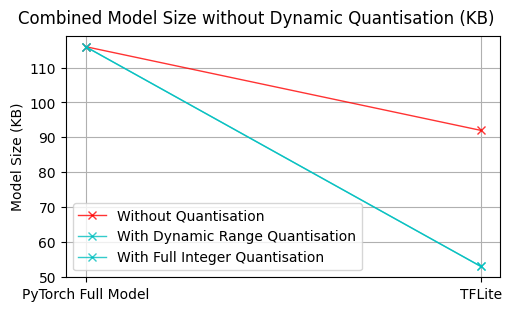

In [51]:
size = [47, 47, 47]
tflite_size = [21, 21, 21]

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1, figsize=(5, 3), constrained_layout=True)

fig.suptitle("Combined Model Size without Dynamic Quantisation (KB)", fontsize=12)

ax0.plot(
    ["PyTorch Full Model", "TFLite"],
    [116, 92],
    marker="x",
    color="r",
    alpha=0.8,
    label="Without Quantisation",
    linewidth=1,
)

ax0.plot(
    ["PyTorch Full Model", "TFLite"],
    [116, 53],
    marker="x",
    color="c",
    alpha=0.8,
    label="With Dynamic Range Quantisation",
    linewidth=1,
)

ax0.plot(
    ["PyTorch Full Model", "TFLite"],
    [116, 53],
    marker="x",
    color="c",
    alpha=0.8,
    label="With Full Integer Quantisation",
    linewidth=1,
)

ax0.set_ylabel("Model Size (KB)")
ax0.legend()

ax0.grid(True)

(-0.5, 803.5, 76.5, -0.5)

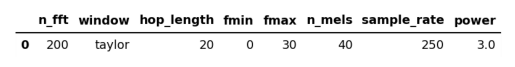

In [52]:
n_fft = 200
window = "taylor"
hop_length = int(n_fft / 10)
fmin = 0
fmax = 30
n_mels = 40
sample_rate = 250
power = 3.0

df = pd.DataFrame(
    {
        "n_fft": [n_fft],
        "window": [window],
        "hop_length": [hop_length],
        "fmin": [fmin],
        "fmax": [fmax],
        "n_mels": [n_mels],
        "sample_rate": [sample_rate],
        "power": [power],
    }
)

df

# dfi.export(
#     df, "results/melspecconfig.png", table_conversion="matplotlib"
# )

img = mpimg.imread("results/melspecconfig.png")
imgplot = plt.imshow(img)
plt.axis("off")

(-0.5, 878.5, 193.5, -0.5)

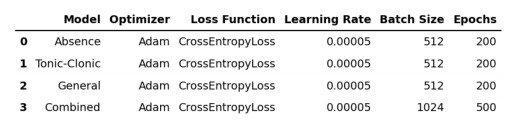

In [53]:
absence_p = ["absence", "Adam", "CrossEntropyLoss", 5e-05, 512, 200]
tonicclonic_p = ["tonicclonic", "Adam", "CrossEntropyLoss", 5e-05, 512, 200]
general_p = ["general", "Adam", "CrossEntropyLoss", 5e-05, 512, 200]
combined_p = ["combined_model", "Adam", "CrossEntropyLoss", 5e-05, 1024, 500]

df = pd.DataFrame(
    {
        "Model": ["Absence", "Tonic-Clonic", "General", "Combined"],
        "Optimizer": ["Adam", "Adam", "Adam", "Adam"],
        "Loss Function": [
            "CrossEntropyLoss",
            "CrossEntropyLoss",
            "CrossEntropyLoss",
            "CrossEntropyLoss",
        ],
        "Learning Rate": [5e-05, 5e-05, 5e-05, 5e-05],
        "Batch Size": [512, 512, 512, 1024],
        "Epochs": [200, 200, 200, 500],
    }
)

dfi.export(df, "results/training_parameters.png", table_conversion="matplotlib")

img = mpimg.imread("results/training_parameters.png")
imgplot = plt.imshow(img)
plt.axis("off")

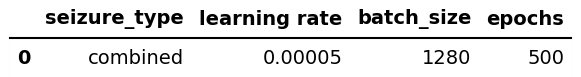

In [54]:
from IPython.display import display

# load dataframe
aaaa = pd.read_csv(
    f"results/pytorch_inference/default/combined/combined_pytorch_hyperparameters.csv"
)

aaaa = aaaa.drop("Unnamed: 0", axis=1)
# aaaa.columns.values
dfi.export(
    aaaa,
    "results/pytorch_inference/default/combined/combined_pytorch_hyperparameters.png",
    table_conversion="matplotlib",
)

img = Image.open(
    "results/pytorch_inference/default/combined/combined_pytorch_hyperparameters.png"
)
display(img)

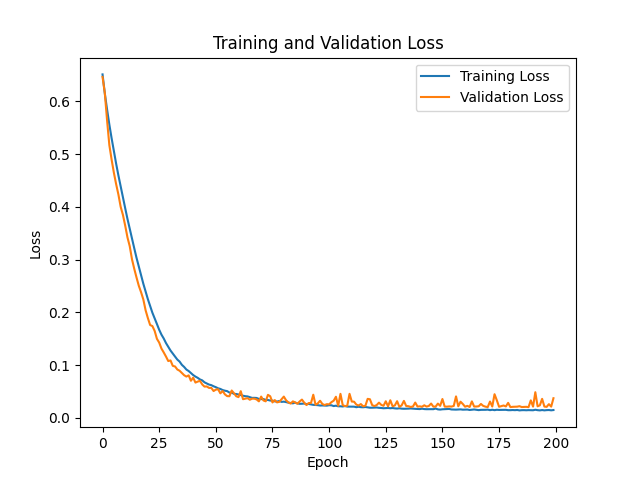

In [34]:
tcsz_learning_curve_img = "results/pytorch_inference/default/absence/absence_loss.png"

img = Image.open(tcsz_learning_curve_img)
display(img)

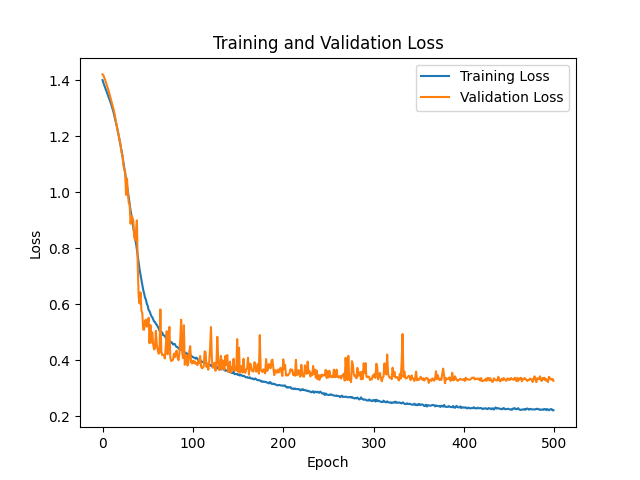

In [56]:
bob = "results/pytorch_inference/default/combined/combined_loss.png"

img = Image.open(bob)
display(img)

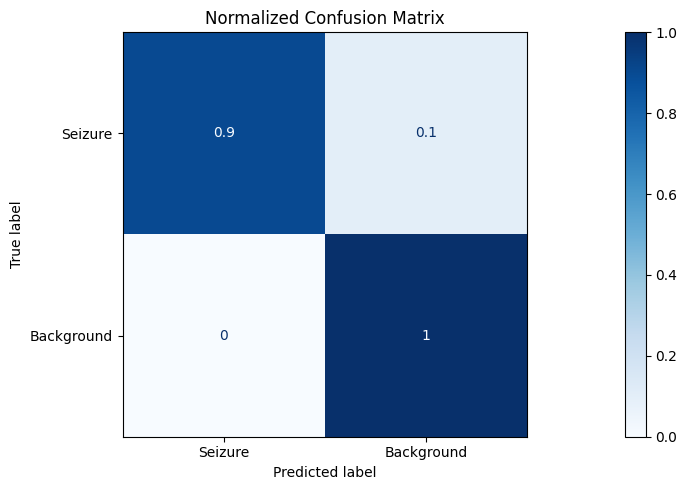

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = pd.read_csv(
    "results/pytorch_inference/default/absence/absence_pytorch_results.csv"
)
conf_mat = conf_mat.drop("Unnamed: 0", axis=1)

conf_mat = conf_mat["tp / fn /tn / fp"]
conf_mat = conf_mat.str.split(" / ", expand=True)

conf_mat = conf_mat.astype(int)

conf_mat = conf_mat.to_numpy()
conf_mat = conf_mat[0]

y_true, y_pred = [], []
for i in range(conf_mat[0]):
    y_true.append(1)
    y_pred.append(1)
for i in range(conf_mat[1]):
    y_true.append(1)
    y_pred.append(0)
for i in range(conf_mat[2]):
    y_true.append(0)
    y_pred.append(0)
for i in range(conf_mat[3]):
    y_true.append(0)
    y_pred.append(1)

for i in range(len(y_true)):
    if y_true[i] == 1:
        y_true[i] = 0
    else:
        y_true[i] = 1


for i in range(len(y_pred)):
    if y_pred[i] == 1:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

cm_unnorm = confusion_matrix(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred, normalize="true")

disp_unnorm = ConfusionMatrixDisplay(
    confusion_matrix=cm_unnorm,
    display_labels=["Seizure", "Background"],
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Seizure", "Background"],
)

plt.figure(figsize=(20, 5))

# plt.subplot(1, 2, 1)
# disp_unnorm.plot(ax=plt.gca(), cmap="Blues", xticks_rotation="horizontal")
# plt.title("Raw Confusion Matrix")

# plt.subplot(1, 2, 2)
disp.plot(ax=plt.gca(), cmap="Blues", xticks_rotation="horizontal")
plt.title("Normalized Confusion Matrix")

plt.tight_layout()
plt.show()

In [38]:
import math

In [55]:
TP = 98
FN = 38
FP = 13
TN = 385

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
print(TP + FN)
specificity = TN / (TN + FP)
print(TN + FP)
gmean = math.sqrt(sensitivity * specificity)

print(f"Accuracy: {round(accuracy, 5)*100}")
print(f"Sensitivity: {round(sensitivity, 5)*100}")
print(f"Specificity: {round(specificity, 5)*100}")
print(f"G-Mean: {round(gmean, 5)*100}")

136
398
Accuracy: 90.449
Sensitivity: 72.059
Specificity: 96.734
G-Mean: 83.49
